In [9]:
#Loading the required libraries
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
#Saving the data as a dataframe

df = pd.read_csv("Screentime-App-Details.csv")
print(df.head(10))


         Date  Usage  Notifications  Times opened        App
0  08/26/2022     38             70            49  Instagram
1  08/27/2022     39             43            48  Instagram
2  08/28/2022     64            231            55  Instagram
3  08/29/2022     14             35            23  Instagram
4  08/30/2022      3             19             5  Instagram
5  08/31/2022     19             25            20  Instagram
6  09/01/2022     44             23            57  Instagram
7  09/02/2022     16             28            22  Instagram
8  09/03/2022     27             15            25  Instagram
9  09/04/2022     72             29            30  Instagram


In [5]:
#check if the dataset contains null values or not

print(df.isnull().sum())

Date             0
Usage            0
Notifications    0
Times opened     0
App              0
dtype: int64


In [7]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Date           54 non-null     object
 1   Usage          54 non-null     int64 
 2   Notifications  54 non-null     int64 
 3   Times opened   54 non-null     int64 
 4   App            54 non-null     object
dtypes: int64(3), object(2)
memory usage: 2.2+ KB
None


In [8]:
print(df.describe())

            Usage  Notifications  Times opened
count   54.000000      54.000000     54.000000
mean    65.037037     117.703704     61.481481
std     58.317272      97.017530     43.836635
min      1.000000       8.000000      2.000000
25%     17.500000      25.750000     23.500000
50%     58.500000      99.000000     62.500000
75%     90.500000     188.250000     90.000000
max    244.000000     405.000000    192.000000


# Usage of apps per day

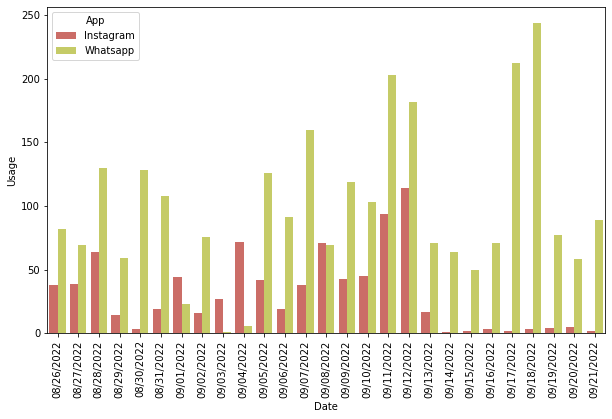

In [60]:
#Usage of the apps per day
plt.figure(figsize=(10, 6))
color_palette = sns.color_palette("hls")
sns.set_palette(color_palette)
plot=sns.barplot(x='Date', 
                 y='Usage', 
                 hue='App',  
                 data=df, 
                 ci=None)
plot.set_xticklabels(plot.get_xticklabels(), rotation=90)
# Show the plot
plt.show()

# Times an app is opened per day

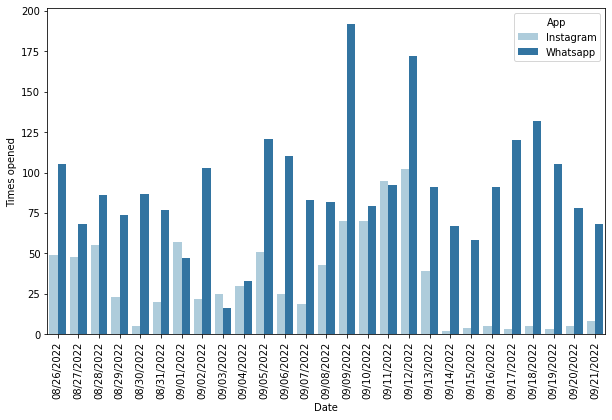

In [62]:
#Times opened per day

plt.figure(figsize=(10, 6))
color_palette = sns.color_palette("Paired")
sns.set_palette(color_palette)

plot=sns.barplot(x='Date', 
                 y='Times opened', 
                 hue='App',  
                 data=df, 
                 ci=None)
plot.set_xticklabels(plot.get_xticklabels(), rotation=90)
# Show the plot
plt.show()

# Number of notifications received on each app per day

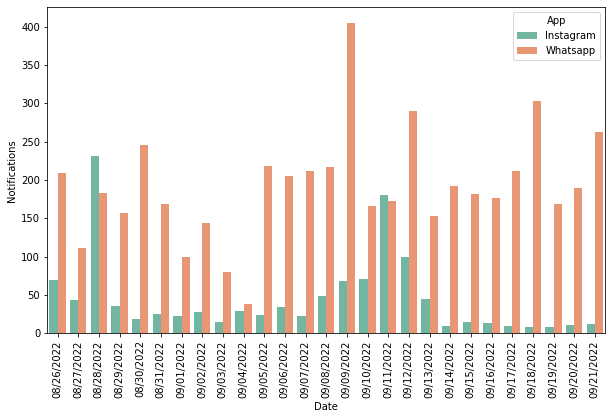

In [68]:
#Number of notifications per day

plt.figure(figsize=(10, 6))
color_palette = sns.color_palette("Set2")
sns.set_palette(color_palette)

plot=sns.barplot(x='Date', 
                 y='Notifications', 
                 hue='App',  
                 data=df, 
                 ci=None)
plot.set_xticklabels(plot.get_xticklabels(), rotation=90)
# Show the plot
plt.show()

# Understanding if there is a relationship between the number of notifications received and the usage of the apps

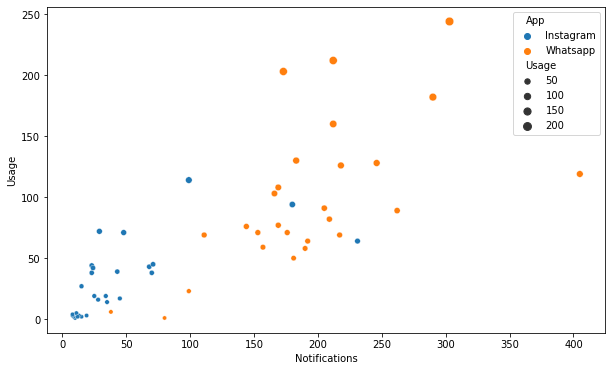

In [30]:
#Understanding if there is a relationship between the number of notifications received and the usage of the apps
plt.figure(figsize=(10, 6))
plot2=sns.scatterplot(x="Notifications",
                    y="Usage",
                    hue="App",
                    size='Usage',
                    data=df)
plt.show()

<Figure size 2160x2880 with 0 Axes>

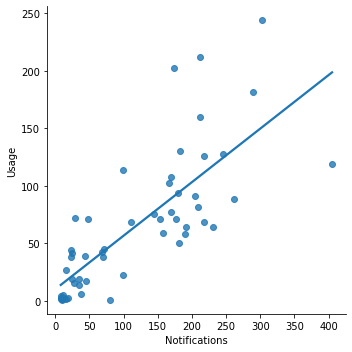

In [33]:
plt.figure(figsize=(30, 40))

sns.lmplot(x = "Notifications",
            y = "Usage", 
            ci = None,
            data = df)
plt.show()

# ==> A correlation exists between the quantity of notifications and the extent of smartphone utilization, implying that an increase in notifications corresponds to heightened smartphone activity.

# Which app was used the maximum?

In [44]:
#Which app had the maximum usage

max_use = df['Usage'].max()

max_use_app = df.loc[df['Usage']== max_use, 'App'].iloc[0]
max_use_date = df.loc[df['Usage']== max_use, 'Date'].iloc[0]

print("The app which was used the maximum was ", max_use_app, "with ", max_use, "usage", "on the day", max_use_date)

The app which was used the maximum was  Whatsapp with  244 usage on the day 09/18/2022


# Which app had the maximum notifications?

In [42]:
#which app had the maximum notifications

max_notif = df['Notifications'].max()

max_notif_app = df.loc[df['Notifications']== max_notif, 'App'].iloc[0]
max_notif_date = df.loc[df['Notifications']== max_notif, 'Date'].iloc[0]


print("The app which was had maximum notifications was ", max_notif_app, "with ", max_notif, "notification", "on the date", max_notif_date)

The app which was had maximum notifications was  Whatsapp with  405 notification on the date 09/09/2022


# Which app was opened the most?

In [47]:
#which app was opened the most

max_open = df['Times opened'].max()

max_open_app = df.loc[df['Times opened']== max_open, 'App'].iloc[0]
max_open_date = df.loc[df['Times opened']== max_open, 'Date'].iloc[0]

print("The app which was opend the maximum was ", max_open_app, "with ", max_open, "openings", "on the day", max_open_date)

The app which was opend the maximum was  Whatsapp with  192 openings on the day 09/09/2022


# Instagram vs Whatsapp

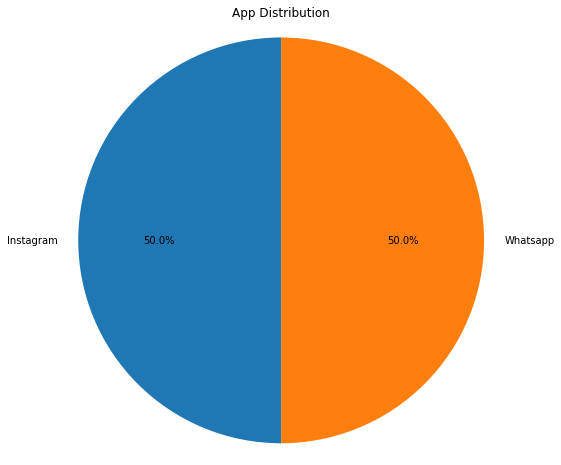

In [51]:
#Pie-chart representing the comparative use of Instagram vs Whatsapp

app_count = df['App'].value_counts()
# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(app_count, labels=app_count.index, autopct='%1.1f%%', startangle=90)
plt.title('App Distribution')

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')

# Show the plot
plt.show()